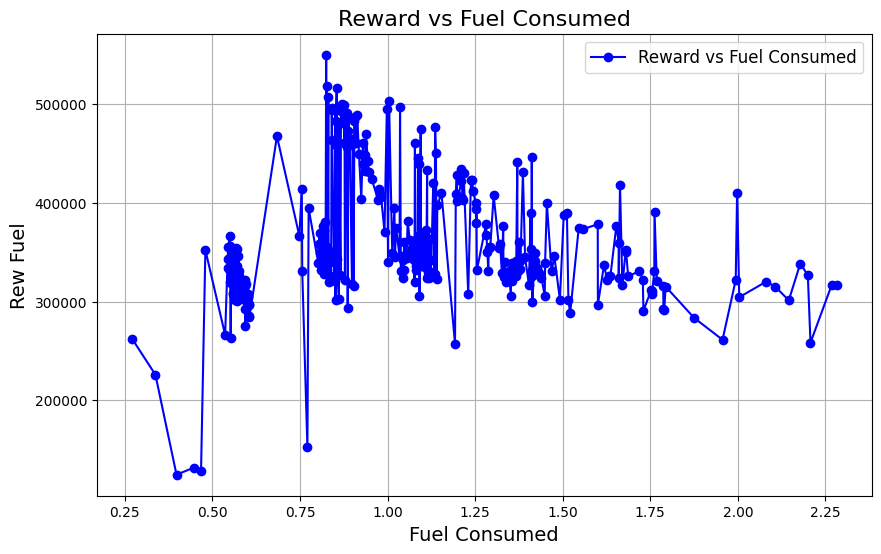

In [10]:
import matplotlib.pyplot as plt

# Path to the text file
file_path = "trained_pid_without_fuel.txt"  # Replace with the actual file path

# Initialize lists to store data
fuel_consumed = []
rew_fuel = []

# Read the file and extract relevant columns
with open(file_path, "r") as file:
    lines = file.readlines()
    # Skip the header line
    for line in lines[1:]:
        # Split the line into columns
        columns = line.split(",")
        # Extract fuel_consumed and rew_fuel
        fuel_consumed.append(float(columns[9]))
        rew_fuel.append(float(columns[10]))

# Sort the data based on fuel_consumed
sorted_data = sorted(zip(fuel_consumed, rew_fuel))
fuel_consumed_sorted, rew_fuel_sorted = zip(*sorted_data)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(fuel_consumed_sorted, rew_fuel_sorted, marker='o', linestyle='-', color='b', label='Reward vs Fuel Consumed')

# Customize the plot
plt.title("Reward vs Fuel Consumed", fontsize=16)
plt.xlabel("Fuel Consumed", fontsize=14)
plt.ylabel("Rew Fuel", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


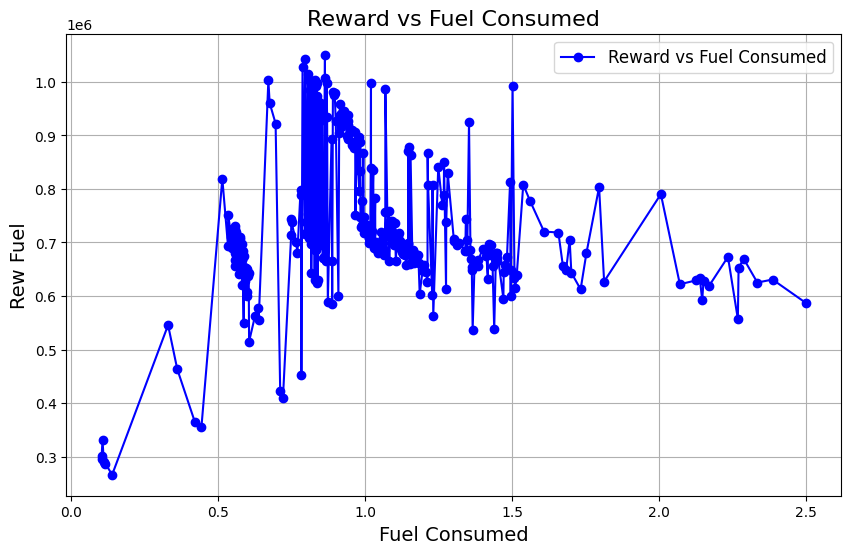

In [11]:
import matplotlib.pyplot as plt

# Path to the text file
file_path = "trained_pid_with_fuel.txt"  # Replace with the actual file path

# Initialize lists to store data
fuel_consumed = []
rew_fuel = []

# Read the file and extract relevant columns
with open(file_path, "r") as file:
    lines = file.readlines()
    # Skip the header line
    for line in lines[1:]:
        # Split the line into columns
        columns = line.split(",")
        # Extract fuel_consumed and rew_fuel
        fuel_consumed.append(float(columns[9]))
        rew_fuel.append(float(columns[10]))

# Sort the data based on fuel_consumed
sorted_data = sorted(zip(fuel_consumed, rew_fuel))
fuel_consumed_sorted, rew_fuel_sorted = zip(*sorted_data)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(fuel_consumed_sorted, rew_fuel_sorted, marker='o', linestyle='-', color='b', label='Reward vs Fuel Consumed')

# Customize the plot
plt.title("Reward vs Fuel Consumed", fontsize=16)
plt.xlabel("Fuel Consumed", fontsize=14)
plt.ylabel("Rew Fuel", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


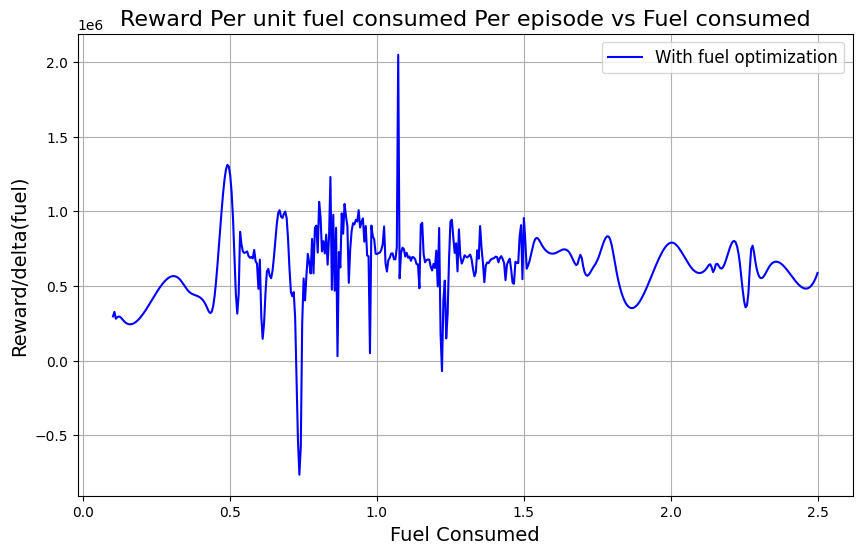

In [17]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Path to the text file
# file_path = "your_file.txt"  # Replace with the actual file path
file_path = "trained_pid_with_fuel.txt"  # Replace with the actual file path


# Initialize lists to store data
fuel_consumed = []
rew_fuel = []

# Read the file and extract relevant columns
with open(file_path, "r") as file:
    lines = file.readlines()
    # Skip the header line
    for line in lines[1:]:
        # Split the line into columns
        columns = line.split(",")
        # Extract fuel_consumed and rew_fuel
        fuel_consumed.append(float(columns[9]))
        rew_fuel.append(float(columns[10]))

# Sort the data based on fuel_consumed
sorted_data = sorted(zip(fuel_consumed, rew_fuel))
fuel_consumed_sorted, rew_fuel_sorted = zip(*sorted_data)

# Remove duplicates from fuel_consumed while averaging corresponding rew_fuel
unique_fuel = []
average_rew_fuel = {}
for fuel, reward in zip(fuel_consumed_sorted, rew_fuel_sorted):
    if fuel not in average_rew_fuel:
        average_rew_fuel[fuel] = []
    average_rew_fuel[fuel].append(reward)

unique_fuel = list(average_rew_fuel.keys())
average_rew = [np.mean(average_rew_fuel[fuel]) for fuel in unique_fuel]

# Convert to numpy arrays for spline
fuel_consumed_array = np.array(unique_fuel)
rew_fuel_array = np.array(average_rew)

# Create a smoothing spline
spline = make_interp_spline(fuel_consumed_array, rew_fuel_array, k=3)  # k=3 for cubic spline
smooth_fuel = np.linspace(fuel_consumed_array.min(), fuel_consumed_array.max(), 500)
smooth_rew = spline(smooth_fuel)

# Plot the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(smooth_fuel, smooth_rew, color='b', label='With fuel optimization')

# Customize the plot
plt.title("Reward Per unit fuel consumed Per episode vs Fuel consumed", fontsize=16)
plt.xlabel("Fuel Consumed", fontsize=14)
plt.ylabel("Reward/delta(fuel)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


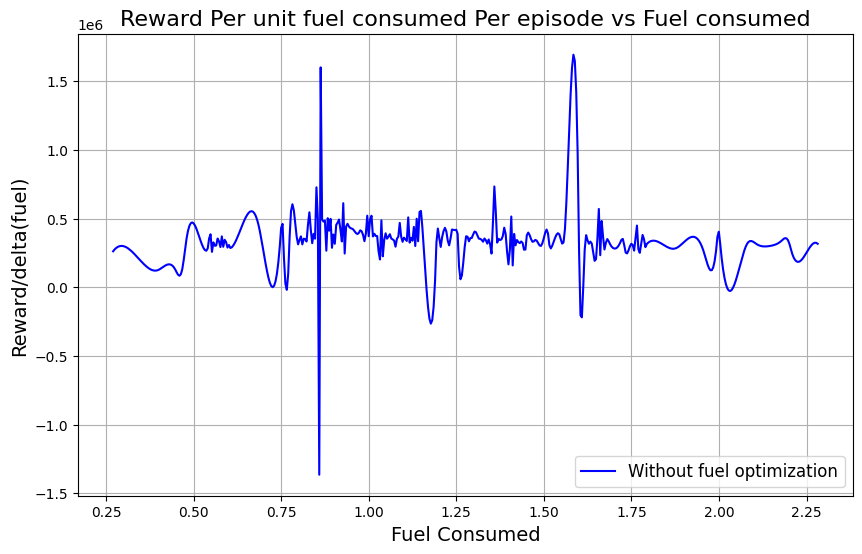

In [20]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Path to the text file
# file_path = "your_file.txt"  # Replace with the actual file path
file_path = "trained_pid_without_fuel.txt"  # Replace with the actual file path


# Initialize lists to store data
fuel_consumed = []
rew_fuel = []

# Read the file and extract relevant columns
with open(file_path, "r") as file:
    lines = file.readlines()
    # Skip the header line
    for line in lines[1:]:
        # Split the line into columns
        columns = line.split(",")
        # Extract fuel_consumed and rew_fuel
        fuel_consumed.append(float(columns[9]))
        rew_fuel.append(float(columns[10]))

# Sort the data based on fuel_consumed
sorted_data = sorted(zip(fuel_consumed, rew_fuel))
fuel_consumed_sorted, rew_fuel_sorted = zip(*sorted_data)

# Remove duplicates from fuel_consumed while averaging corresponding rew_fuel
unique_fuel = []
average_rew_fuel = {}
for fuel, reward in zip(fuel_consumed_sorted, rew_fuel_sorted):
    if fuel not in average_rew_fuel:
        average_rew_fuel[fuel] = []
    average_rew_fuel[fuel].append(reward)

unique_fuel = list(average_rew_fuel.keys())
average_rew = [np.mean(average_rew_fuel[fuel]) for fuel in unique_fuel]

# Convert to numpy arrays for spline
fuel_consumed_array = np.array(unique_fuel)
rew_fuel_array = np.array(average_rew)

# Create a smoothing spline
spline = make_interp_spline(fuel_consumed_array, rew_fuel_array, k=3)  # k=3 for cubic spline
smooth_fuel = np.linspace(fuel_consumed_array.min(), fuel_consumed_array.max(), 500)
smooth_rew = spline(smooth_fuel)

# Plot the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(smooth_fuel, smooth_rew, color='b',label = 'Without fuel optimization')

# Customize the plot
plt.title("Reward Per unit fuel consumed Per episode vs Fuel consumed", fontsize=16)
plt.xlabel("Fuel Consumed", fontsize=14)
plt.ylabel("Reward/delta(fuel)", fontsize=14)
plt.ylabel("Reward/delta(fuel)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()
